In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('colour.jpg')
csv_path = 'colors.csv'
plt.figure(figsize=(40,40))

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

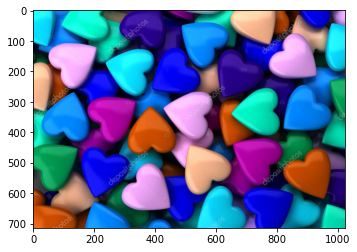

In [3]:
plt.imshow(image)

In [4]:
grid_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

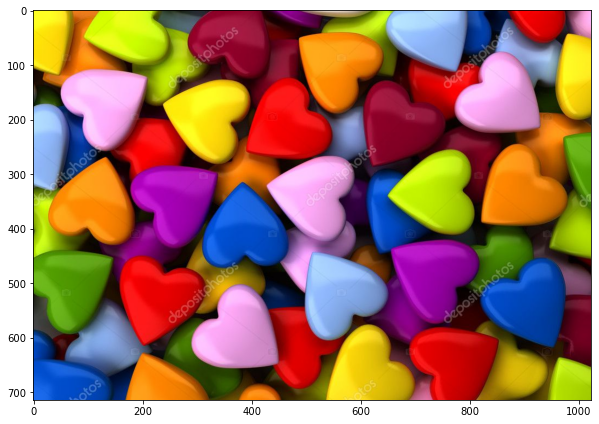

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(grid_RGB)

In [6]:
info = ['colour', 'colour_name', 'hex', 'R', 'G', 'B']
df = pd.read_csv("colors.csv", names=info, header=None)

In [7]:
clicked = False
r = g = b = xpos = ypos = 0

In [8]:

def get_color_name (R,G,B):
    minimum = 1000
    for i in range (len(df)):
        d = abs(R - int(df.loc[i,'R'])) + abs(G - int(df.loc[i,'G'])) + abs(B - int(df.loc[i,'B']))
        if d <= minimum:
            minimum = d
            cname = df.loc[i,'colour_name']
            
    return cname

In [9]:
def draw_function(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b, g, r, xpos, ypos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r = image[y,x]
        b = int(b)
        g = int(g)
        r = int(r)

In [10]:
cv2.namedWindow('Task 2')
cv2.setMouseCallback('Task 2', draw_function)

In [11]:
while True:
    cv2.imshow('Task 2',image)
    if clicked:
        cv2.rectangle(image, (20,20), (600,60), (b,g,r), -1)
        
        text = get_color_name(r,g,b) + ' R  =' + str(r) + ' G = ' + str(g) + ' B = ' + str(b)
        
        cv2.putText(image, text, (50,50), 2,0.8, (255,255,255),2,cv2.LINE_AA)
        
    if cv2.waitKey(20) & 0xFF == 27:
            break
            
cv2.destroyAllWindows()